In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Dense, Input
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data.csv')
y = data['child_mort']
X = data.drop(['child_mort', 'country'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Reshape x_train for Conv1D: (samples, steps, features)
x_train_reshaped = np.expand_dims(x_train.values, axis=1)  # shape: (samples, 1, features)

model = Sequential([
    Input(shape=(1, x_train.shape[1])),  # Forma: (1, n_features)
    
    # Capa Conv1D para extraer patrones locales (kernel_size=3 para grupos de 3 features)
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    # MaxPooling1D(pool_size=1),  # No reduce dimensiones, pero puedes ajustar
    
    # # Otra capa convolucional opcional
    # Conv1D(filters=32, kernel_size=2, activation='relu'),
    
    # Flatten(),
    
    # # Capas densas para interpretar features
    # Dense(64, activation='relu'),
    # Dropout(0.2),  # Regularización
    Dense(1)  # Salida lineal (regresión)
])

# Compilación
model.compile(
    optimizer='adam',
    loss='mse',  # Error cuadrático medio para regresión
    metrics=['mae']  # Error absoluto medio
)

# Entrenamiento
history = model.fit(
    x_train_reshaped, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 13141001.0000 - mae: 2168.3103 - val_loss: 1017837.5000 - val_mae: 653.1766
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2458483.5000 - mae: 924.7941 - val_loss: 22948.0254 - val_mae: 113.8960
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 194225.3750 - mae: 268.6478 - val_loss: 145773.8281 - val_mae: 243.4429
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 718345.1875 - mae: 558.4229 - val_loss: 117245.8984 - val_mae: 225.6582
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 352881.5312 - mae: 375.8825 - val_loss: 10598.9424 - val_mae: 78.5521
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31794.9922 - mae: 121.7821 - val_loss: 24389.9043 - val_mae: 117.3519
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73559.5781 - mae: 178.4486 - val_loss: 31229.9922 - val_mae: 126.8266
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52537.8203 - mae: 155.3652 - val_loss: 8903.8672 

In [27]:
model.evaluate(np.expand_dims(x_test.values, axis=1), y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2429.2966 - mae: 35.9109


[2391.375244140625, 35.648738861083984]

In [28]:
# model.evaluate(np.expand_dims(x_test.values, axis=1), y_test)
model.predict(np.expand_dims(x_test.values, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[[  9.732952 ]],

       [[ -5.3550296]],

       [[ 33.672222 ]],

       [[  7.3548093]],

       [[ 14.54292  ]],

       [[ -8.769092 ]],

       [[  7.5985227]],

       [[ 52.74043  ]],

       [[ 16.588268 ]],

       [[ 17.473326 ]],

       [[ 17.179485 ]],

       [[ 25.231304 ]],

       [[ 38.65391  ]],

       [[-10.7185545]],

       [[ 22.753918 ]],

       [[ -2.0993683]],

       [[ 11.674855 ]],

       [[-23.775684 ]],

       [[-23.025806 ]],

       [[ -2.791736 ]],

       [[ -4.6999393]],

       [[ 38.962265 ]],

       [[ 11.822466 ]],

       [[ 62.746403 ]],

       [[-50.83208  ]],

       [[  8.215802 ]],

       [[  6.419354 ]],

       [[  9.049893 ]],

       [[ -5.4065433]],

       [[ 11.138055 ]],

       [[ -3.0432923]],

       [[-10.270556 ]],

       [[ 15.091565 ]],

       [[ 44.221874 ]]], dtype=float32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


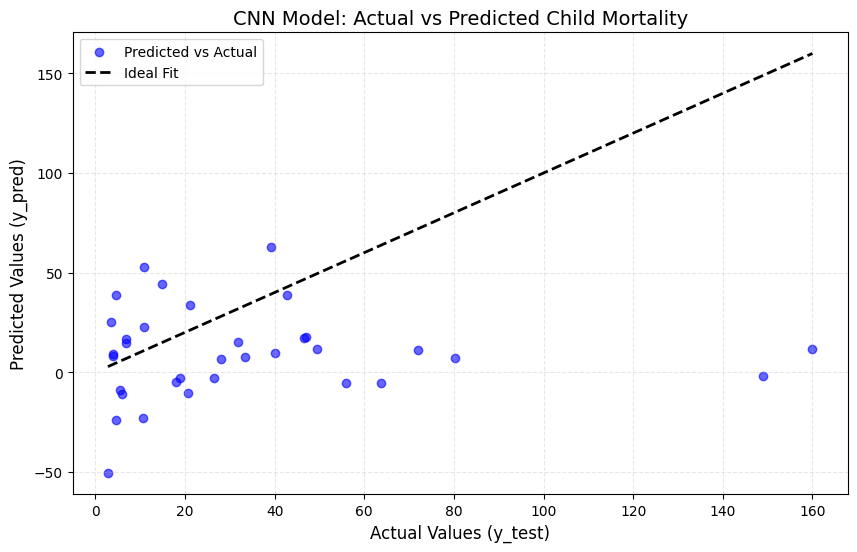

In [29]:
import matplotlib.pyplot as plt

# Generate predictions
x_test_reshaped = np.expand_dims(x_test.values, axis=1)  # Reshape test data
y_pred = model.predict(x_test_reshaped).flatten()  # Flatten predictions

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Add ideal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', lw=2, label='Ideal Fit')

# Labels and title
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.title('CNN Model: Actual vs Predicted Child Mortality', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate metrics (MAE and R²)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR²: {r2:.2f}', 
#          transform=plt.gca().transAxes,
#          verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()